In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("University_Dataset(tmc_raw_data_2020_2029).csv", parse_dates=["count_date", "start_time", "end_time"])

In [10]:
vehicle_columns = [
    "n_appr_cars_r", "n_appr_cars_t", "n_appr_cars_l", "s_appr_cars_r", "s_appr_cars_t", "s_appr_cars_l",
    "e_appr_cars_r", "e_appr_cars_t", "e_appr_cars_l", "w_appr_cars_r", "w_appr_cars_t", "w_appr_cars_l",
    "n_appr_truck_r", "n_appr_truck_t", "n_appr_truck_l", "s_appr_truck_r", "s_appr_truck_t", "s_appr_truck_l",
    "e_appr_truck_r", "e_appr_truck_t", "e_appr_truck_l", "w_appr_truck_r", "w_appr_truck_t", "w_appr_truck_l",
    "n_appr_bus_r", "n_appr_bus_t", "n_appr_bus_l", "s_appr_bus_r", "s_appr_bus_t", "s_appr_bus_l",
    "e_appr_bus_r", "e_appr_bus_t", "e_appr_bus_l", "w_appr_bus_r", "w_appr_bus_t", "w_appr_bus_l"
]

df["total_vehicles"] = df[vehicle_columns].sum(axis=1)
df["hour"] = df["start_time"].dt.hour  # Extract hour for time-based analysis

## High Congestion Times

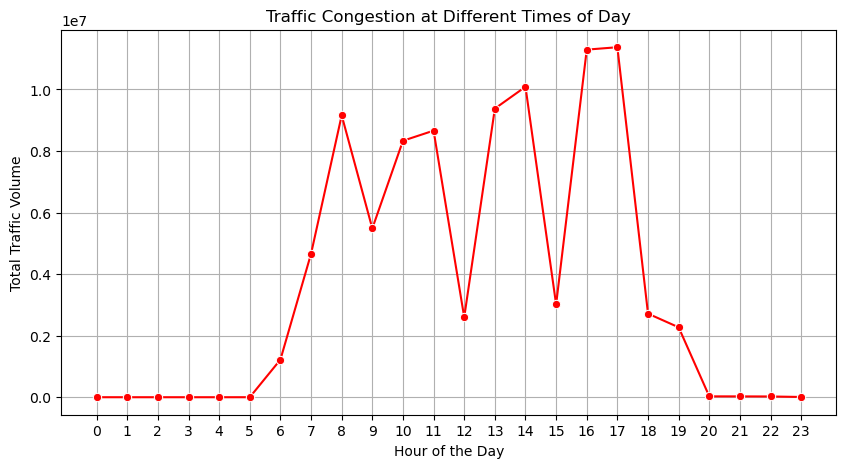

In [12]:
time_traffic = df.groupby("hour")["total_vehicles"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_traffic, x="hour", y="total_vehicles", marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Traffic Volume")
plt.title("Traffic Congestion at Different Times of Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


### <span style="color:teal">Key Insights:</span>

- **<span style="color:teal">Peak Traffic Hours:</span>**  
  The highest traffic volume occurs between **16:00 (4 PM)** and **17:00 (5 PM)**, with over **11 million vehicles** recorded during these hours. This indicates significant congestion during evening rush hour.

- **<span style="color:teal">Morning Rush:</span>**  
  The **morning rush** starts around **7:00 AM**, reaching its peak at **8:00 AM**, with **9.1 million vehicles**. This is likely the result of commuter traffic.

- **<span style="color:teal">Lowest Traffic Hours:</span>**  
  The **early morning (1 AM - 4 AM)** hours have the lowest traffic volumes, with counts as low as **77 vehicles at 3 AM**, reflecting reduced activity at night.

- **<span style="color:teal">Late Evening Drop:</span>**  
  Traffic sharply declines after **6:00 PM**, with minimal vehicle counts observed after **9:00 PM**, suggesting a significant reduction in driving activity as the day ends.

### <span style="color:teal">Conclusion:</span>  
The traffic congestion follows a typical pattern with rush hours occurring in the morning and evening, while nighttime hours experience minimal activity. Efforts to optimize traffic during peak hours could help alleviate congestion during these critical times.


## Traffic Volumes Before & After Light-Controlled Intersections

In [6]:
df["traffic_slowdown"] = df["n_appr_cars_t"] - df["s_appr_cars_t"]
slowdown_analysis = df.groupby("location_name")["traffic_slowdown"].mean().reset_index()

# Find locations with the highest slowdown
slowdown_analysis = slowdown_analysis.sort_values(by="traffic_slowdown", ascending=False)

print(slowdown_analysis.head(10))  # Top locations where traffic slows down

                                          location_name  traffic_slowdown
817                        Don Mills Rd W / Goodview Rd        209.035714
819                    Don Mills Rd W: near Goodview Rd        182.984375
818        Don Mills Rd W: Don Mills Rd E - Goodview Rd        178.093750
2452  Queen's Park Cres W / Hoskin Ave / Queen's Par...        147.964744
3303                 Yonge St / 401 C W Yonge St S Ramp        136.687500
1737          Kipling Ave / Kipling S Gardiner C W Ramp        114.468750
23                                Albion Rd / Armel Crt        110.553571
1620  Kennedy Rd S 401 C W Ramp: Highway 401 - Kenne...        110.375000
51    Allen Rd / Allen Rd / William R Allen Rd / Tra...        110.052632
39                              Albion Rd / Shendale Dr        104.607143


## Bottlenecks Due to Left Turns

/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_3064/3525809000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=left_turn_analysis.head(10), x="total_left_turns", y="location_name", palette="magma")


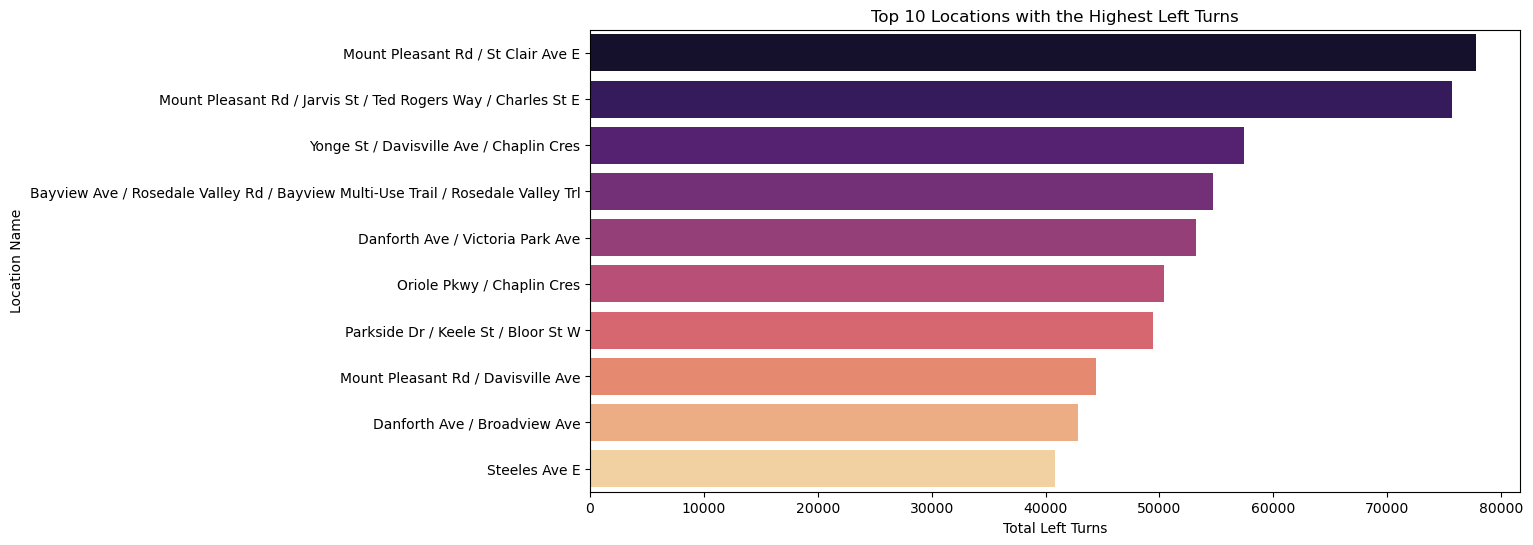

In [7]:
df["total_left_turns"] = df[["n_appr_cars_l", "s_appr_cars_l", "e_appr_cars_l", "w_appr_cars_l"]].sum(axis=1)

left_turn_analysis = df.groupby("location_name")["total_left_turns"].sum().reset_index()
left_turn_analysis = left_turn_analysis.sort_values(by="total_left_turns", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=left_turn_analysis.head(10), x="total_left_turns", y="location_name", palette="magma")
plt.xlabel("Total Left Turns")
plt.ylabel("Location Name")
plt.title("Top 10 Locations with the Highest Left Turns")
plt.show()

## Effective Traffic Light Schedules

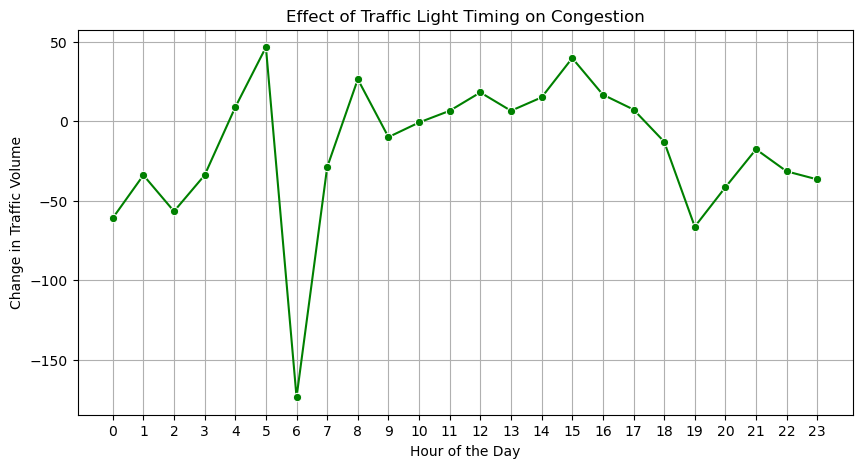

In [8]:
df["congestion_change"] = df.groupby("location_name")["total_vehicles"].diff()

congestion_analysis = df.groupby("hour")["congestion_change"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=congestion_analysis, x="hour", y="congestion_change", marker="o", color="green")
plt.xlabel("Hour of the Day")
plt.ylabel("Change in Traffic Volume")
plt.title("Effect of Traffic Light Timing on Congestion")
plt.xticks(range(0, 24))
plt.grid()
plt.show()